This notebook supports the Fig. 4B of the Review "Blastocoel morphogenesis: a biophysics perspective" (Le Vergee--Serandour, Turlier, 2021). We provide the model and the numerical code used to produce the Figure. 

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

# 1-cell
We calculate the aspect ratio of a cell lying on a surface, at constant area.s

## Parametrization
We consider a circular cell in contact with a surface. The 2d-shape of the cell is given by the contact angle $\theta$ and its radius $R$. We want to calculate the aspect ratio $r$ and the area of the cell.

### Cell area
The cell area is given by the circle area, $\pi R^2$ minus the area of the cap that is not under the surface. Cap area is given by
$$A_{\rm{cap}} = \frac{R^2}{2}\left[2\theta - \sin(2\theta) \right]$$
thus the cell area is
$$A = \frac{R^2}{2} \left[2\pi - 2\theta + \sin(2\theta) \right]$$

### Aspect ratio
Introducing the aspect ratio $r$ as
$$r = \frac{L}{H}$$
where $L$ is the length of the cell, along the surface, $H$ is the cell's height, transverse to the surface. 
The height is given by
$$H = R(1+\cos \theta)$$
The length $L$ is expressed depending on two cases :
- Case 1: $0< \theta \leq\frac{\pi}{2}$ : $L = 2R$, thus 
$$r = \frac{2}{1+\cos\theta}$$
- Case 2: $\frac{\pi}{2}< \theta \leq\pi$ : $L = 2R\sin\theta$, thus 
$$r = \frac{2\sin\theta}{1+\cos\theta}$$

Interestingly, the aspect ratio is independent of the radius, illustrating the scale-independence. Only the contact angle controls the cell's shape, in other words, only the surface tension of the cell and its adhesion to the surface.

In [2]:
def cap_height(R, angle) :
    """
    Calculate the height of a cap with radius R, and given contact angle
    """
    return R*(1-np.cos(angle))

def aspect_ratio(angle) :
    """
    Calculate the aspect ratio of a cell given its contact angle.
    """
    if angle >= pi/2 :
        factor = np.sin(angle)
    else : factor = 1.
    return 2*factor/(1+np.cos(angle))

def area_cap(r, angle) :
    """
    Calculate the area of the cell's cap.
    """
    return 0.5* (2*pi - 2*angle + np.sin(2*angle)) *r**2 
        
def calc_radius(A, angle) :
    """
    Calculate the radius associated with an area A and the contact angle.
    """
    return np.sqrt(2*A/(2*pi-2*angle+np.sin(2*angle)))


In [3]:
def plot_blast(X, angle, ax, cste_area=False, xlim=1.1, axis=False) :
    """
    Plot a cell/blastomere given an input parameter X, contact angle and ax for the figure.
    
    X is either the imposed area (ctse_area=True) or the radius
    """
    if angle <= 0.5*pi :
        psi = pi/2. - angle
        theta1 = -psi*180/pi
        theta2 = (pi+psi)*180/pi
    else :
        psi = angle - pi/2
        theta1 = psi*180/pi
        theta2 = (pi-psi)*180/pi
    
    if cste_area == True :
        R = calc_radius(X, angle)
    else :
        R = X
        
    h = cap_height(R, angle)
    Y = R - h
    H = R*(1.+np.cos(angle))

    area = area_cap(R, angle)

    
    draw_arc = Arc((0, Y), width=2*R, height=2*R, angle=0.0, theta1=theta1, theta2=theta2, linestyle='-', color='g', linewidth=2)
    ax.add_artist(draw_arc)
    ax.hlines(xmin=-xlim, xmax=xlim, y=0, color='k')
    ax.axis('equal')
    ax.set_xlim(-xlim, xlim)
    ax.set_ylim(0, 2.*xlim)
    
    if not axis :
        ax.axis('off')
    else :
        ax.grid()

    title = ''
    title += 'theta = '+ "{:2.2f}".format(angle) 
    title += '\nA = '+ "{:2.2f}".format(area)
    title += '\nR = '+ "{:2.2f}".format(R)
    title += '\nH = '+ "{:2.2f}".format(H)
    ax.set_title(title)
    
    

## Constant curvature radius R=1
Below we plot four cases of cells on a surface at constant radius $R$. Area is not conserved from one case to the other. Inputs are the contact angle (theta) and the radius (R), outputs are the area (A) and the height (H).

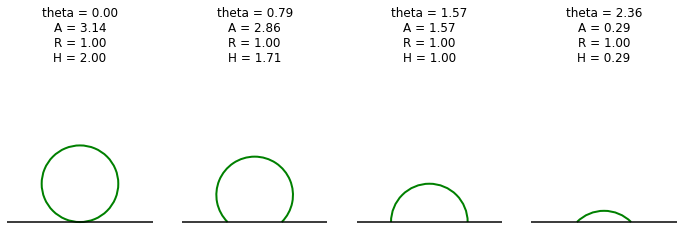

In [8]:
X = 4
theta = [0., pi/X, pi/2., pi-pi/X]
X = np.ones(len(theta))

fig, ax = plt.subplots(1, len(theta), figsize=(3*len(theta), 3))

for i in range(len(theta)) :
    plot_blast(X[i], theta[i], ax[i], cste_area=False, xlim=1.9, axis=False)
    

plt.show()



## Constant area A=1
Below we plot four cases of cells on a surface at constant area $A$. Radius is not conserved from one case to the other. Inputs are the contact angle (theta) and the area (A), outputs are the radius (R) and the height (H).

### Plot

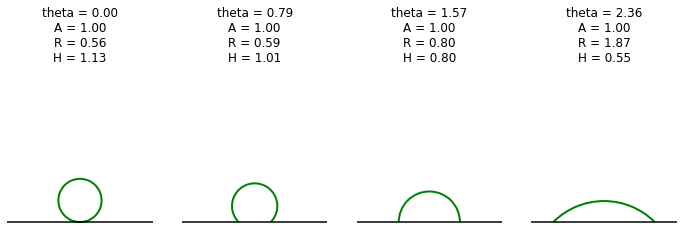

In [9]:
T = 4
theta = [0., pi/T, pi/2., pi-pi/T]
X = np.ones(len(theta))

fig, ax = plt.subplots(1, len(theta), figsize=(3*len(theta), 3))

for i in range(len(theta)) :
    plot_blast(X[i], theta[i], ax[i], cste_area=True, xlim=1.9)
    
plt.axis('off')
plt.show()


### Aspect Ratio

We define the compaction parameter, $\alpha$ as
$$\alpha = \cos \theta$$
where $\theta $ is the contact angle of the cell and the substrate

We also define the aspect ratio of the spreading droplet as
$$r = \frac{L}{H} = \begin{cases}\frac{2}{1+\cos \theta}&, 0 \leq \theta \leq \frac{\pi}{2} \\ \frac{2\sin\theta}{1+\cos \theta}&, \frac{\pi}{2} \leq \theta \leq \pi\end{cases}$$

Four cases are illustrated below (black dots), and indicated with a black dot. The red line corresponds to the calculation of the aspect ratio versus compaction parameter $\alpha$

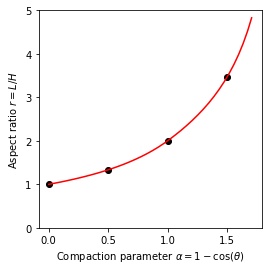

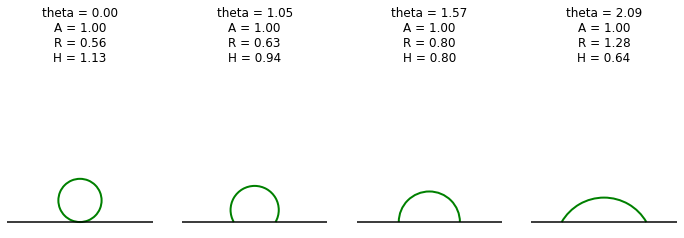

In [6]:
T = 3
theta = [0., pi/T, pi/2., pi-pi/T]
X = np.ones(len(theta))

theta_list = np.linspace(0., 3*pi/4, 50)

r = np.array([aspect_ratio(theta_list[i]) for i in range(len(theta_list))])

alpha = 1-np.cos(theta_list)

plt.figure(figsize=(4, 4))

plt.plot(alpha, r, color='r')

for i in range(len(theta)) :
    plt.scatter(1-np.cos(theta[i]), aspect_ratio(theta[i]), color='k')

plt.ylabel('Aspect ratio '+r'$r=L/H$')
plt.xlabel('Compaction parameter ' + r'$\alpha = 1-\cos(\theta)$')
plt.ylim(0., 5.)

#plt.savefig('aspectratio_VS_compaction.eps', format='eps')

plt.show()




fig, ax = plt.subplots(1, len(theta), figsize=(3*len(theta), 3))

for i in range(len(theta)) :
    plot_blast(X[i], theta[i], ax[i], cste_area=True, xlim=1.9)
    
#plt.savefig('compaction_examples_60degrees.eps', format='eps')
plt.show()